In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
import pandas as pd


Could not import rpy package
Could not import r-package RCIT


In [2]:
#np.random.seed(42)     # Fix random seed
#links_coeffs = {0: [((0, -1), 0.7), ((1, -1), -0.8)],
#                1: [((1, -1), 0.8), ((3, -1), 0.8)],
#                2: [((2, -1), 0.5), ((1, -2), 0.5), ((3, -3), 0.6)],
#                3: [((3, -1), 0.4)],
#                }
#T = 1000     # time series length
#data, true_parents_neighbors = pp.var_process(links_coeffs, T=T)
#T,N = data.shape

# Initialize dataframe object, specify time axis and variable names
#var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
#dataframe = pp.DataFrame(data, 
#                         datatime = np.arange(len(data)), 
#                         var_names=var_names)

In [3]:
#dataframe

In [4]:
#parcorr = ParCorr(significance='analytic')
#pcmci = PCMCI(
#    dataframe=dataframe, 
#    cond_ind_test=parcorr,
#    verbosity=1)

In [5]:
#correlations = pcmci.get_lagged_dependencies(tau_max=20)
#lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
#                                    'x_base':5, 'y_base':.5})

In [6]:
#pcmci.verbosity = 1
#results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)

In [7]:
#q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
#pcmci.print_significant_links(
#        p_matrix = results['p_matrix'], 
#        q_matrix = q_matrix,
#        val_matrix = results['val_matrix'],
#       alpha_level = 0.01)

In [8]:
#link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
     #                   val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

In [9]:
#tp.plot_graph(
#    val_matrix=results['val_matrix'],
#    link_matrix=link_matrix,
#    var_names=var_names,
#    link_colorbar_label='cross-MCI',
#    node_colorbar_label='auto-MCI',
#    )

In [10]:
#tp.plot_time_series_graph(
#    val_matrix=results['val_matrix'],
#    link_matrix=link_matrix,
#    var_names=var_names,
#    link_colorbar_label='MCI',
#    )

In [78]:
import pickle as pkl

In [79]:
with open('/home/gaston/MachineLearning/LS1BASE.pkl', 'rb') as f:
    Base = pkl.load(f)

In [80]:
Base.columns

Index(['Func_Chancador_3', 'Func_Chancador_4', 'Corriente_Chancador_3',
       'Corriente_Chancador_4', 'Experto_Sag_4', 'Presion_Descansos',
       'Func_Correa_13', 'Func_Correa_14', 'Nivel_Bin_55', 'Nivel_Bin_54',
       'Temperatura_Bushing_Chancador_4', 'Temperatura_Retorno_Chancador_4',
       'Pebble_Procesado', 'Pebble_Generado', 'Tonelaje_SAG4', 'PebbleMenos34',
       'PebbleMas12', 'P50', 'P80', 'Nivel1', 'Nivel2', 'LimiteMaxTonalaje',
       'LimiteMinTonelaje', 'TonelajeSetPoint', 'Gruesos', 'Medios', 'Finos',
       'Potencia', 'Corriente_Feeder_6', 'Corriente_Feeder_7',
       'Corriente_Feeder_8', 'Corriente_Feeder_9', 'Corriente_Feeder_10',
       'Corriente_Feeder_11', 'Corriente_Feeder_12', 'Corriente_Feeder_13',
       'Velocidad_Feeder_6', 'Velocidad_Feeder_7', 'Velocidad_Feeder_8',
       'Velocidad_Feeder_9', 'Velocidad_Feeder_10', 'Velocidad_Feeder_11',
       'Velocidad_Feeder_12', 'Velocidad_Feeder_13', 'Ratio_Feeder_6',
       'Ratio_Feeder_7', 'Ratio_Feeder_

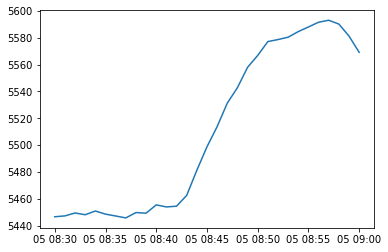

In [175]:
plt.plot(Base['2017-10-05 08:30:00':'2017-10-05 09:00:00'][['Presion_Descansos']])

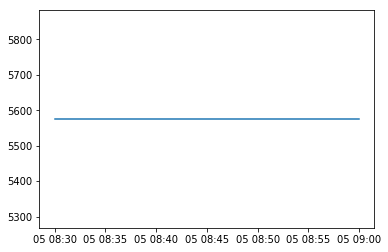

In [176]:
plt.plot(Base['2017-10-05 08:30:00':'2017-10-05 09:00:00'][['MaximoPresion']])

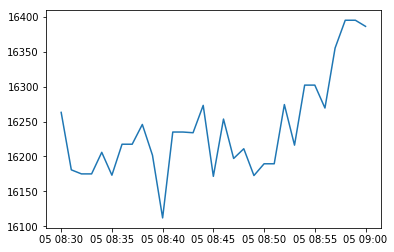

In [177]:
plt.plot(Base['2017-10-05 08:30:00':'2017-10-05 09:00:00'][['Potencia']])

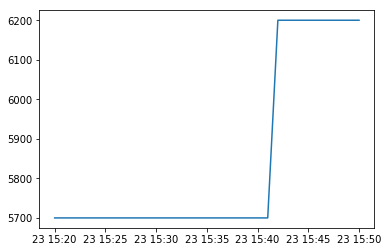

In [172]:
plt.plot(Base['2017-09-23 15:20:00':'2017-09-23 15:50:00'][['LimiteMaxTonalaje']])

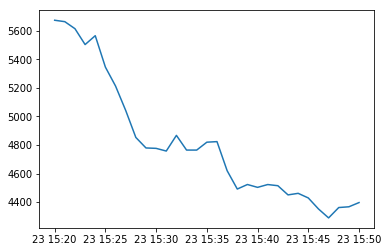

In [173]:
plt.plot(Base['2017-09-23 15:20:00':'2017-09-23 15:50:00'][['Tonelaje_SAG4']])

In [84]:
Base['Operativo'] = 0
Base['Operativo'].loc[Base['Tonelaje_SAG4']>=4000] = 1

In [85]:
Base[['Tonelaje_SAG4','Operativo']].head()

,Tonelaje_SAG4,Operativo
Timestamp,,
2017-07-01 00:00:00,5820.39,1
2017-07-01 00:01:00,5843.40,1
2017-07-01 00:02:00,5854.19,1
2017-07-01 00:03:00,5904.00,1
2017-07-01 00:04:00,5867.99,1


In [320]:
'''
Pasar esto a la linea 2 con los nuevos datos
Crear la funcion de sobrecarga por campaña y ver la relación con la tabla creada
'''
from datetime import datetime, timedelta

fecha1 = '2018-04-01 01:00:00'
a = list()
fecha = list()
for i in np.arange(10000):
    if fecha1 == '2018-04-01 01:00:00':
        fecha1 = pd.to_datetime(fecha1)
        fecha2 = fecha1 + timedelta(minutes=10)
        fecha1 = str(fecha1)
        fecha2 = str(fecha2)
        Bas = Base[['Presion_Descansos','Potencia','Operativo']][fecha1:fecha2]
        cor = Bas.corr().iloc[0,1]
        presionSub = Bas['Presion_Descansos'].iloc[-1]-Bas['Presion_Descansos'].iloc[0]
        Suma = Bas['Operativo'].sum()
        if ((cor<0.1) & (presionSub>100) & (Suma >= 11)):
            print(str(fecha1) + ' ' + str(cor))
        fecha1 = pd.to_datetime(fecha1)+timedelta(minutes=5)
    else:
        fecha1 = pd.to_datetime(fecha1)
        fecha2 = fecha1 + timedelta(minutes=10)
        fecha1 = str(fecha1)
        fecha2 = str(fecha2)
        Bas = Base[['Presion_Descansos','Potencia','Operativo']][fecha1:fecha2]
        cor = Bas.corr().iloc[0,1]
        presionSub = Bas['Presion_Descansos'][-1]-Bas['Presion_Descansos'][0]
        Suma = Bas['Operativo'].sum()
        if (cor<0.1) & (presionSub>100) & (Suma >= 11):
            print(str(fecha1) + ' ' + str(cor))
        fecha1 = pd.to_datetime(fecha1)+timedelta(minutes=5)

2018-04-02 13:15:00 -0.7629558309974634
2018-04-02 20:50:00 -0.9244699716917024
2018-04-05 02:20:00 -0.8407277151063193
2018-04-08 04:45:00 -0.45785243512032825
2018-04-08 04:50:00 -0.9757886069063846
2018-04-08 04:55:00 -0.9746184553620743
2018-04-16 16:35:00 -0.36210438902151987
2018-04-21 18:25:00 -0.8834184178049811
2018-04-26 08:35:00 -0.8012606088949599


In [327]:
fechaDetectada = '2018-04-08 04:50:00'
fecha1a = str(pd.to_datetime(fechaDetectada) - timedelta(minutes=30))
fecha1b = str(pd.to_datetime(fechaDetectada) + timedelta(minutes=30))
Tags = ['Presion_Descansos','MaximoPresion','Potencia',
        'LimiteMaxTonalaje','Medios','Gruesos',
        'Pebble_Procesado','Pebble_Generado','Experto_Sag_4','Tonelaje_SAG4']

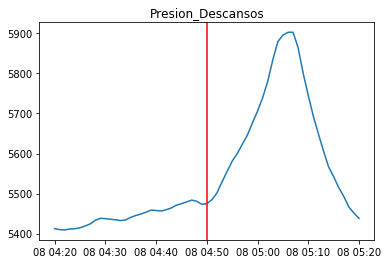

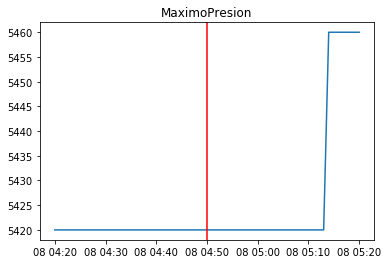

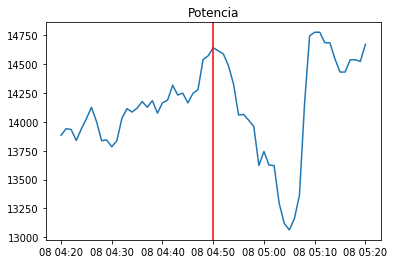

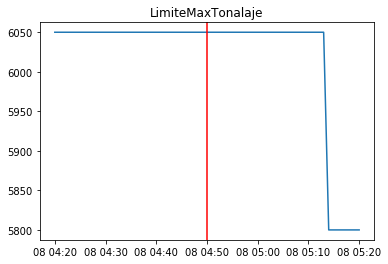

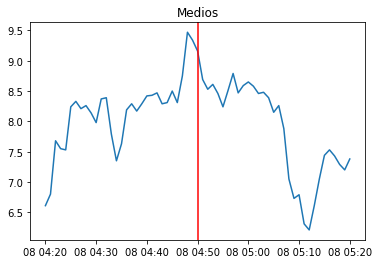

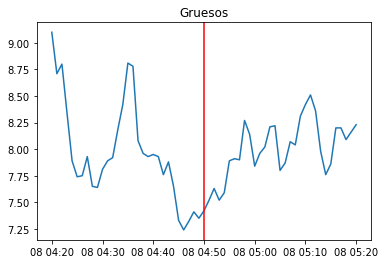

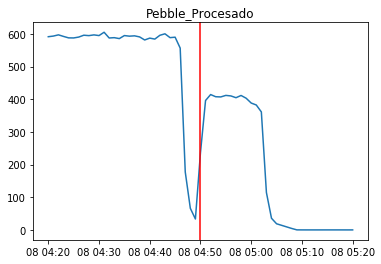

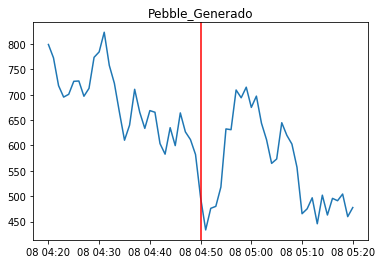

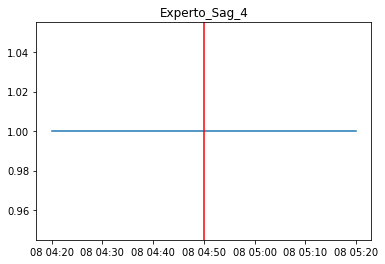

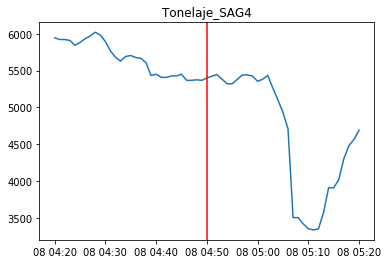

<Figure size 432x288 with 0 Axes>

In [328]:
for i in Tags:
    plt.plot(Base[fecha1a:fecha1b][i])
    plt.title(i)
    plt.axvline(x=fechaDetectada,color='red')
    plt.figure()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

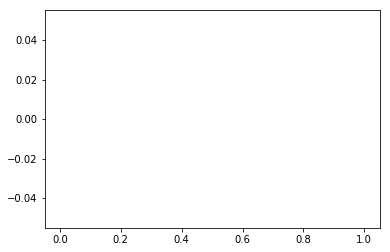

In [297]:
plt.hist(b)

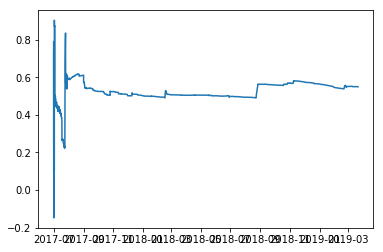

In [253]:
plt.plot(Base1['Presion_Descansos'])

In [181]:
#Base1['Presion_Descansos'].describe()

count    6.000000e+01
mean     1.000000e+00
std      1.131537e-08
min      9.999999e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Presion_Descansos, dtype: float64

In [141]:
var_names = ['PresionDesc','Potencia','Medios','Gruesos']
Base1Hora = Base['2018-06-13 10:00:00':'2018-06-13 23:00:00'][var_names]
Base1Hora = Base1Hora.diff(5)
#Base1Horadiff.columns = ['PresionDescDiff','PotenciaDiff','MediosDiff','GruesosDiff']
#Base1Horadiff5 = Base1Hora.diff(5)
#Base1Horadiff5.columns = ['PresionDescDiff5','PotenciaDiff5','MediosDiff5','GruesosDiff5']
#Base1Horadiff10 = Base1Hora.diff(10)
#Base1Horadiff10.columns = ['PresionDescDiff10','PotenciaDiff10','MediosDiff10','GruesosDiff10']
#Base1Hora = pd.concat([Base1Hora,Base1Horadiff],axis=1)
Base1Hora = (Base1Hora-Base1Hora.mean())/Base1Hora.std()
Base1Hora = Base1Hora.dropna()
#for i in Base1Hora.columns:
#    print(i)
#    Base1Hora = Base1Hora[Base1Hora[i]!=0]
var_names = ['PresionDesc','Potencia','Medios','Gruesos']

In [142]:
dataframe = pp.DataFrame(np.array(Base1Hora), 
                         datatime = np.arange(Base1Hora.shape[0]), 
                         var_names=var_names)

In [143]:
dataframe

In [144]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


## Estimating lagged dependencies


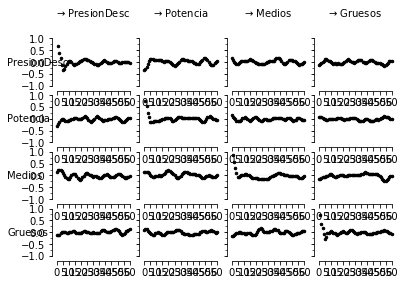

In [145]:
correlations = pcmci.get_lagged_dependencies(tau_max=60)
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5})

In [146]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=60, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 60
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable PresionDesc

## Variable Potencia

## Variable Medios

## Variable Gruesos

## Resulting condition sets:

    Variable PresionDesc has 26 parent(s):
    [pc_alpha = 0.5]
        (PresionDesc -1): max_pval = 0.00000, min_val = 0.578
        (PresionDesc -5): max_pval = 0.00000, min_val = 0.342
        (Potencia -7): max_pval = 0.03953, min_val = 0.080
        (Potencia -22): max_pval = 0.04808, min_val = 0.077
        (PresionDesc -33): max_pval = 0.05518, min_val = 0.076
        (Potencia -54): max_pval = 0.08458, min_val = 0.068
        (Gruesos -60): max_pval = 0.13758, min_val = 0.058
        (PresionDesc -22): max_pval = 0.15600, min_val = 0.056
        (PresionDesc -6): max_pval = 0.19618, min_val = 0.051
        (Gruesos -37): max_pval = 0.22669, min_val = 0.048
        (Medios -17): max_pval = 0.22875

In [152]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
       alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable PresionDesc has 7 link(s):
        (PresionDesc -1): pval = 0.00000 | qval = 0.00000 | val = 0.573
        (PresionDesc -5): pval = 0.00000 | qval = 0.00000 | val = -0.516
        (PresionDesc -10): pval = 0.00000 | qval = 0.00000 | val = -0.407
        (PresionDesc -6): pval = 0.00000 | qval = 0.00000 | val = 0.288
        (PresionDesc -11): pval = 0.00000 | qval = 0.00000 | val = 0.257
        (Potencia 0): pval = 0.00000 | qval = 0.00000 | val = -0.206
        (Medios 0): pval = 0.00569 | qval = 0.00569 | val = 0.112

    Variable Potencia has 6 link(s):
        (Potencia -1): pval = 0.00000 | qval = 0.00000 | val = 0.622
        (Potencia -5): pval = 0.00000 | qval = 0.00000 | val = -0.415
        (Potencia -6): pval = 0.00000 | qval = 0.00000 | val = 0.344
        (Potencia -7): pval = 0.00000 | qval = 0.00000 | val = 0.289
        (Potencia -2): pval = 0.00000 | qval = 0.00000 | val = 0.259
        (PresionDesc 0): pval = 0.000

In [153]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']



In [154]:
link_matrix

array([[[False,  True, False, False, False,  True,  True, False, False,
         False,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [ True, Fa

(<Figure size 432x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f703ffef898>)

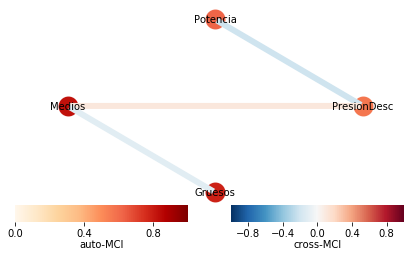

In [155]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    )

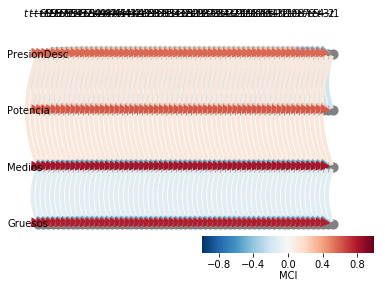

In [151]:
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='MCI',
    )

In [156]:
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=0)
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.2)
pcmci_parcorr.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.1)


## Significant links at alpha = 0.1:

    Variable PresionDesc has 5 link(s):
        (PresionDesc -1): pval = 0.00000 | val = 0.620
        (Potencia 0): pval = 0.00000 | val = -0.200
        (Gruesos -2): pval = 0.01199 | val = -0.091
        (Medios -1): pval = 0.06821 | val = 0.066
        (Medios 0): pval = 0.08028 | val = 0.063

    Variable Potencia has 8 link(s):
        (Potencia -1): pval = 0.00000 | val = 0.609
        (PresionDesc 0): pval = 0.00000 | val = -0.200
        (Potencia -2): pval = 0.00000 | val = 0.180
        (PresionDesc -1): pval = 0.00044 | val = -0.127
        (Medios -1): pval = 0.02608 | val = 0.080
        (Medios 0): pval = 0.05839 | val = 0.068
        (Gruesos -1): pval = 0.08251 | val = 0.063
        (Gruesos 0): pval = 0.09396 | val = -0.061

    Variable Medios has 6 link(s):
        (Medios -1): pval = 0.00000 | val = 0.800
        (Medios -2): pval = 0.00000 | val = -0.535
        (Gruesos -1): pval = 0.00971 | val = -0.093
        (Gruesos 0):

In [157]:
gpdc = GPDC(significance='analytic', gp_params=None)
# gpdc.generate_and_save_nulldists(sample_sizes=range(495, 501),
#     null_dist_filename='dc_nulldists.npz')
gpdc.null_dist_filename ='dc_nulldists.npz'
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc,
    verbosity=0)

In [158]:
results = pcmci_gpdc.run_pcmci(tau_max=2, pc_alpha=0.1)
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.1)


## Significant links at alpha = 0.1:

    Variable PresionDesc has 3 link(s):
        (PresionDesc -1): pval = 0.00000 | val = 0.288
        (Potencia 0): pval = 0.00000 | val = 0.027
        (Gruesos -2): pval = 0.01300 | val = 0.010

    Variable Potencia has 9 link(s):
        (Potencia -1): pval = 0.00000 | val = 0.279
        (PresionDesc 0): pval = 0.00000 | val = 0.027
        (Potencia -2): pval = 0.00100 | val = 0.016
        (PresionDesc -1): pval = 0.00100 | val = 0.015
        (Gruesos -2): pval = 0.04300 | val = 0.007
        (PresionDesc -2): pval = 0.06600 | val = 0.006
        (Gruesos -1): pval = 0.06800 | val = 0.006
        (Medios -1): pval = 0.08400 | val = 0.006
        (Medios 0): pval = 0.10000 | val = 0.006

    Variable Medios has 4 link(s):
        (Medios -1): pval = 0.00000 | val = 0.563
        (Medios -2): pval = 0.00000 | val = 0.218
        (Gruesos -1): pval = 0.06200 | val = 0.006
        (Potencia 0): pval = 0.10000 | val = 0.006

    Variable Grues

In [180]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5)
pcmci_cmi_knn = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=cmi_knn,
    verbosity=2)
results = pcmci_cmi_knn.run_pcmci(tau_max=2, pc_alpha=0.05)
pcmci_cmi_knn.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 2
pc_alpha = 0.05
max_conds_dim = None
max_combinations = 1



## Variable PresionDesc

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link (PresionDesc -1) --> PresionDesc (1/8):
    Combination 0:  --> pval = 0.29500 / val = 0.004
    Non-significance detected.

    Link (PresionDesc -2) --> PresionDesc (2/8):
    Combination 0:  --> pval = 0.27500 / val = 0.003
    Non-significance detected.

    Link (Gruesos -1) --> PresionDesc (3/8):
    Combination 0:  --> pval = 0.60500 / val = -0.003
    Non-significance detected.

    Link (Gruesos -2) --> PresionDesc (4/8):
    Combination 0:  --> pval = 0.01400 / val = 0.021
    No conditions of dimension 0 left.

    Link (Medios -1) --> PresionDesc (5/8):
    Combination 0:  --> pval = 0.59800 / val = -0.003
    Non-significance detected.

    Link (Medios -2) --> PresionDesc 

Contemporaneous I(1; 0)=-0.001 != I(0; 1)=-0.002 due to conditions, finite sample effects or masking, here edge color = larger (absolute) value.
Contemporaneous I(1; 2)=0.009 != I(2; 1)=0.009 due to conditions, finite sample effects or masking, here edge color = larger (absolute) value.
Contemporaneous I(1; 3)=-0.008 != I(3; 1)=-0.006 due to conditions, finite sample effects or masking, here edge color = larger (absolute) value.
Contemporaneous I(2; 1)=0.009 != I(1; 2)=0.009 due to conditions, finite sample effects or masking, here edge color = larger (absolute) value.
Contemporaneous I(3; 2)=-0.002 != I(2; 3)=-0.002 due to conditions, finite sample effects or masking, here edge color = larger (absolute) value.


(<Figure size 432x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f968c026f28>)

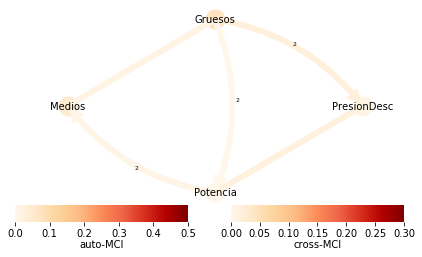

In [181]:
link_matrix = pcmci_cmi_knn.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.1)['link_matrix']
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    )